# Dimensionality Reduction and Feature Selection

[Prashant Brahmbhatt](https://www.github.com/hashbanger)

___

### Imports

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv('train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


___

## Missing Value Ratio

In this approach we first calculate the density of missing values and fill them or drop them depending on the threshold of missing values percentage that we set.

In [67]:
df_1 = df

In [68]:
df_1.isnull().sum()/len(df) * 100

Item_Identifier               0.000000
Item_Weight                  16.734813
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.431659
Outlet_Location_Type          0.014603
Outlet_Type                   0.014603
Item_Outlet_Sales             0.014603
dtype: float64

We can observe that five columns have missing values.  
A logical step now here would be to drop the columns having missing values percentage above 20% and impute the ones having less.

In [69]:
missing_pct = df_1.isnull().sum()/len(df_1) * 100

In [70]:
drop_feat = []
for col in df_1.columns:
    if missing_pct[col] > 20:
        drop_feat.append(col)

In [71]:
df_1 = df_1.drop(drop_feat, axis= 1)
df_1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


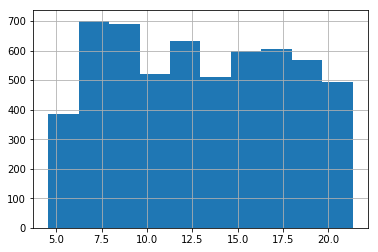

In [72]:
pd.Series.hist(df_1['Item_Weight'])
plt.show()

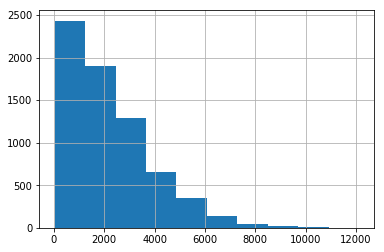

In [73]:
pd.Series.hist(df_1['Item_Outlet_Sales'])
plt.show()

In [74]:
df_1['Item_Weight'].fillna(df_1['Item_Weight'].mean(), inplace = True)
df_1['Item_Outlet_Sales'].fillna(df_1['Item_Outlet_Sales'].median(), inplace = True)
df_1['Outlet_Type'].fillna(df_1['Outlet_Type'].value_counts()[0], inplace = True)  # replacing with most occuring value
df_1['Outlet_Location_Type'].fillna(df_1['Outlet_Location_Type'].value_counts()[0], inplace = True) # replacing with most occuring value

___

## Low Variance Filter

If a feature in our dataset contains a single type of value in all the cells then it would not be useful for either the analysis or the model. Similarly the features which have low variance should be dropped as they provide little to no information to the model.

In [75]:
df_1.isnull().sum()/len(df_1) * 100 # No Null values left

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

As observed the variance of the **Item_Visibility** is very less so we better drop this column.

In [76]:
variance_pct = df_1.var()
print(variance_pct)

Item_Weight                  1.805188e+01
Item_Visibility              2.641049e-03
Item_MRP                     3.857140e+03
Outlet_Establishment_Year    6.959394e+01
Item_Outlet_Sales            2.891304e+06
dtype: float64


In [77]:
drop_feat = []
for col in variance_pct.index:
    if variance_pct[col] <= 10:
        drop_feat.append(col)

In [78]:
df_1 = df_1.drop(drop_feat, axis = 1)
df_1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


___

## High Correlation

We should always remove features that are similar to any other feature in the feature set or are highly correlated as they carry similar information and including both causes multicollinearity in the model.  
However, we should keep the features which are highly correalted with the target variable.

In [79]:
df_1.drop(['Item_Outlet_Sales'], axis = 1).corr()

,Item_Weight,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,0.020162,-0.004367
Item_MRP,0.020162,1.000000,0.006037
Outlet_Establishment_Year,-0.004367,0.006037,1.000000


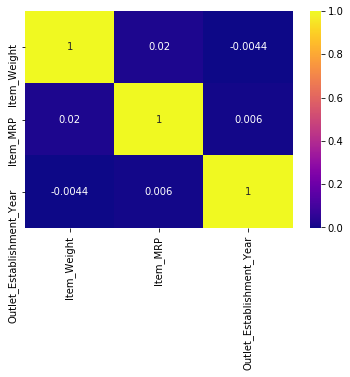

In [80]:
sns.heatmap(df_1.drop(['Item_Outlet_Sales'], axis = 1).corr(), cmap = 'plasma', annot= True)

As evident from the plot as well as the table we don;t have any correlated features.

___

## Random Forest

In [81]:
df_1 = df_1.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1)

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
df_dummmied = pd.get_dummies(df_1)
df_dummmied.drop('Item_Outlet_Sales', axis = 1, inplace = True)

In [84]:
regressor = RandomForestRegressor(max_depth= 10)


In [85]:
regressor.fit(df_dummmied, df_1['Item_Outlet_Sales'])

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Now we get the top 10 features

In [86]:
importances = regressor.feature_importances_
idx = importances.argsort()[-9:]

In [87]:
importances

array([2.73587106e-02, 5.40223618e-01, 4.45873477e-02, 1.62635648e-03,
       2.93022253e-03, 2.82079475e-03, 2.09843314e-03, 1.33236534e-03,
       1.29249656e-03, 2.38870332e-03, 2.06023560e-03, 2.20606072e-03,
       5.23712130e-03, 1.97684773e-03, 5.18244580e-03, 1.61859180e-03,
       2.04536526e-03, 2.64840142e-03, 1.36858284e-03, 3.77607066e-04,
       6.64807988e-04, 3.09396934e-03, 2.93093903e-03, 1.85939520e-03,
       0.00000000e+00, 1.04941043e-03, 2.01221502e-03, 2.11798752e-03,
       0.00000000e+00, 2.66252576e-01, 3.87019560e-03, 5.35134433e-04,
       6.42330614e-02])

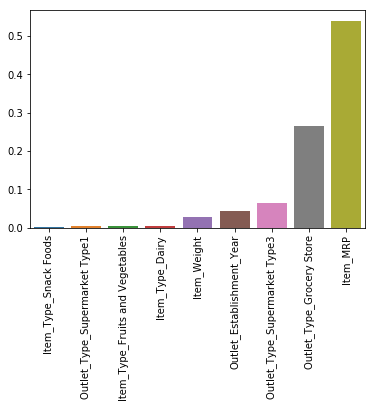

In [88]:
fig = sns.barplot(x = df_dummmied.T.iloc[idx].index, y = importances[idx])
# plt.xticks(rotation = 'vertical')
fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)
plt.show()

Now we can either pick ourselves the features that show most importance or alternatively we can use the function **SelectFromModel** to let it pick them features from the model itself.

In [89]:
from sklearn.feature_selection import SelectFromModel

In [90]:
feature = SelectFromModel(regressor)

In [91]:
feature.fit_transform(df_dummmied, df_1['Item_Outlet_Sales'])

array([[249.8092,   0.    ,   0.    ],
       [ 48.2692,   0.    ,   0.    ],
       [141.618 ,   0.    ,   0.    ],
       ...,
       [216.9824,   0.    ,   0.    ],
       [179.1344,   0.    ,   1.    ],
       [154.1998,   0.    ,   0.    ]])

___

## Backward Elimination

The Backward elimination is a well known procedure for feature selection. It includes the following steps:  
* Fit the model selecting all the features  
* Measure the significance of each of the feature and select a threshold
* Remove the features with greater p-value then threshold
* Fit the model
* Repeat the process

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [93]:
l_regressor = LinearRegression()
rfe = RFE(l_regressor, 4)

In [94]:
rfe.fit_transform(df_dummmied, df_1['Item_Outlet_Sales'])

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.]])

There's another more manual method of Backward elimination found [here](https://github.com/hashbanger/Machine_Learning_Implementations/blob/master/SciKit_Implementations/MultipleRegression/mR_with_BackElim.py)

___

## Forward Feature Selection

Sequential feature selection proceeds as:  
* Start with a constant model, $M0$
* Try all models $M1$ consisting of just one feature and pick the best according to the F statistic
* Try all models $M2$ consisting of $M1$ plus one other feature and pick the best ...

Know in depth about f_regression and r2 based selection [here](https://stats.stackexchange.com/questions/204141/difference-between-selecting-features-based-on-f-regression-and-based-on-r2)

Know about F-Statistic and P-Value [here](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/f-statistic-value-test/)

In [95]:
from sklearn.feature_selection import f_regression

In [96]:
f_reg = f_regression(df_dummmied, df_1['Item_Outlet_Sales'])
f_reg 

(array([2.50293355e-01, 3.33006750e+03, 2.04259100e+01, 1.45733727e+00,
        2.50397156e+00, 6.59161095e+00, 1.30246960e-01, 2.14014355e+00,
        1.30469376e+01, 1.59707547e-02, 1.54148818e+00, 1.39317189e+00,
        9.33315915e-01, 1.05988377e+00, 8.14142179e+00, 2.76179152e-02,
        2.90523927e+00, 3.05866905e-02, 7.23575931e-01, 3.96338718e+00,
        2.68515733e-02, 4.70717333e+00, 2.82695836e+00, 3.35918416e+00,
        5.30032720e-02, 7.88823671e+01, 2.50617175e+01, 1.07487517e+01,
        5.30032720e-02, 1.36851894e+03, 8.45124840e+01, 1.24284105e+01,
        7.07381500e+02]),
 array([6.16884674e-001, 0.00000000e+000, 6.30267755e-006, 2.27395972e-001,
        1.13605790e-001, 1.02670842e-002, 7.18187255e-001, 1.43534371e-001,
        3.05956861e-004, 8.99438445e-001, 2.14438964e-001, 2.37911181e-001,
        3.34036892e-001, 3.03278065e-001, 4.33951360e-003, 8.68015180e-001,
        8.83375252e-002, 8.61170839e-001, 3.95003187e-001, 4.65397337e-002,
        8.69842654

The f_regression gives out the F-statistic along with their P-values. We will now select the features with F-Statistic greater than 10.

In [97]:
feats = np.argwhere(f_reg[0] > 10)
feats.flatten()

array([ 1,  2,  8, 25, 26, 27, 29, 30, 31, 32], dtype=int64)

In [98]:
df_dummmied.iloc[:, feats.flatten()].head()

,Item_MRP,Outlet_Establishment_Year,Item_Type_Baking Goods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,249.8092,1999,0,1,0,0,0,1,0,0
1,48.2692,2009,0,0,0,1,0,0,1,0
2,141.6180,1999,0,1,0,0,0,1,0,0
3,182.0950,1998,0,0,0,1,1,0,0,0
4,53.8614,1987,0,0,0,1,0,1,0,0


So we have got our best features based on the sequential selection procedure.

___

### Import data

In [118]:
import cv2
from glob import glob
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
train_mnist, test_mnist = fashion_mnist.load_data()

In [121]:
print("Train Images length {}\nTrain Labels {}".format(len(train_mnist[0]), len(train_mnist[1])))
print("\nTest Images length {}\nTest Labels {}".format(len(test_mnist[0]), len(test_mnist[1])))

Train Images length 60000
Train Labels 60000

Test Images length 10000
Test Labels 10000


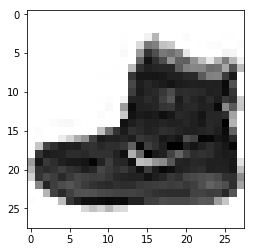

In [149]:
plt.imshow(train_mnist[0][0], cmap = plt.cm.binary)
plt.show()

Since functions of our use require 1 dimensional arrays for each image, we have to flatten the images from 28*28 to 784

In [150]:
train_images = []
for i in range(0,60000):
    img = train_mnist[0][i].flatten()
    train_images.append(img)
train_images = np.array(train_images)

In [153]:
train_images.shape

(60000, 784)

In [160]:
feat_cols = ["pixel"+str(i) for i in range(train_images.shape[1])] # generating Columnns

In [159]:
df_mnist = pd.DataFrame(train_images, columns = feat_cols)
df_mnist.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


___

## Factor Analysis

Factor analysis is a useful tool for investigating variable relationships for complex concepts. It allows researchers to investigate concepts that are not easily measured directly by collapsing a large number of variables into a few interpretable underlying factors. The key concept of factor analysis is that multiple observed variables have similar patterns of responses because they are all associated with a latent (i.e. not directly measured) variable.  

In the Factor Analysis technique, variables are grouped by their correlations, i.e., all variables in a particular group will have a high correlation among themselves, but a low correlation with variables of other group(s). Here, each group is known as a factor.

Decomposing the dataset using Factor Analysis

In [163]:
from sklearn.decomposition import FactorAnalysis

In [170]:
FA = FactorAnalysis(n_components= 3).fit_transform(df_mnist[feat_cols].values)

In [171]:
FA.shape

(60000, 3)

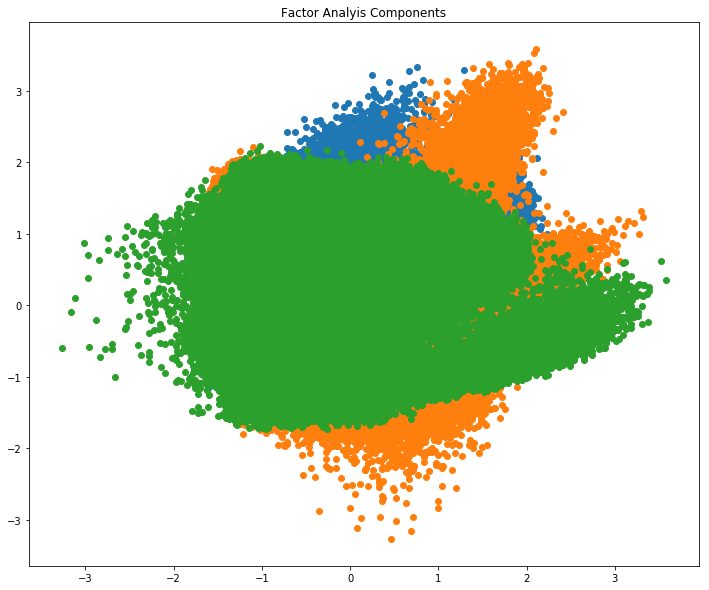

In [184]:
plt.figure(figsize=(12,10))
plt.scatter(FA[:, 0], FA[:, 1])
plt.scatter(FA[:, 1], FA[:, 2])
plt.scatter(FA[:, 2], FA[:, 0])
plt.title('Factor Analyis Components')
plt.show()

We can see all the different factors in the above graph. Here, the x-axis and y-axis represent the values of decomposed factors. As I mentioned earlier, it is hard to observe these factors individually but we have been able to reduce the dimensions of our data successfully.

___

## Principal Component Analysis

Principal component analysis is a method of extracting important variables (in form of components) from a large set of variables available in a data set. It extracts low dimensional set of features from a high dimensional data set with a motive to capture as much information as possible. With fewer variables, visualization also becomes much more meaningful. PCA is more useful when dealing with 3 or higher dimensional data.

* A principal component is a linear combination of the original variables
* Principal components are extracted in such a way that the first principal component explains maximum variance in the dataset
* Second principal component tries to explain the remaining variance in the dataset and is uncorrelated to the first principal component
* Third principal component tries to explain the variance which is not explained by the first two principal components and so on